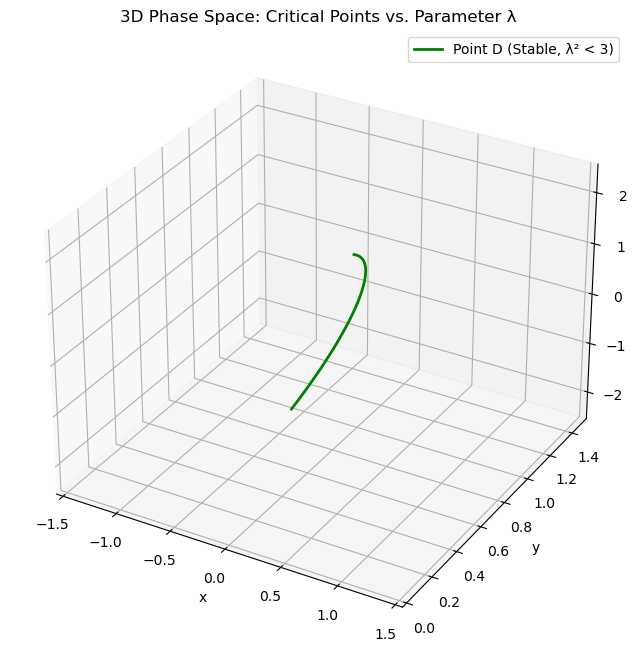

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the range for lambda (from -sqrt(6) to sqrt(6))
lambda_max = np.sqrt(6)  # approx 2.45
lambda_vals = np.linspace(-lambda_max, lambda_max, 100)


# --- Plot Point D (lambda/6, sqrt(1 - lambda^2/6)) ---
# Compute x_c and y_c for Point D as a function of lambda
x_c_D = lambda_vals / 6
y_c_D = np.sqrt(np.maximum(0, 1 - (lambda_vals**2) / 6))  # Ensure no negative under sqrt

# Split Point D into stable and saddle regions based on lambda^2
lambda2 = lambda_vals**2
stable_mask = lambda2 < 3  # Stable when lambda^2 < 3
saddle_mask = (lambda2 >= 3) & (lambda2 <= 6)  # Saddle when 3 <= lambda^2 <= 6

# Plot stable part (lambda^2 < 3) in green
ax.plot(x_c_D[stable_mask], y_c_D[stable_mask], lambda_vals[stable_mask], 
        color='green', label='Point D (Stable, λ² < 3)', linewidth=2)

# Label the axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('λ')

# Set axis limits
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([0, 1.5])
ax.set_zlim([-lambda_max, lambda_max])

# Add a title
ax.set_title('3D Phase Space: Critical Points vs. Parameter λ')

# Add a legend
ax.legend()

# Show the plot
plt.show()

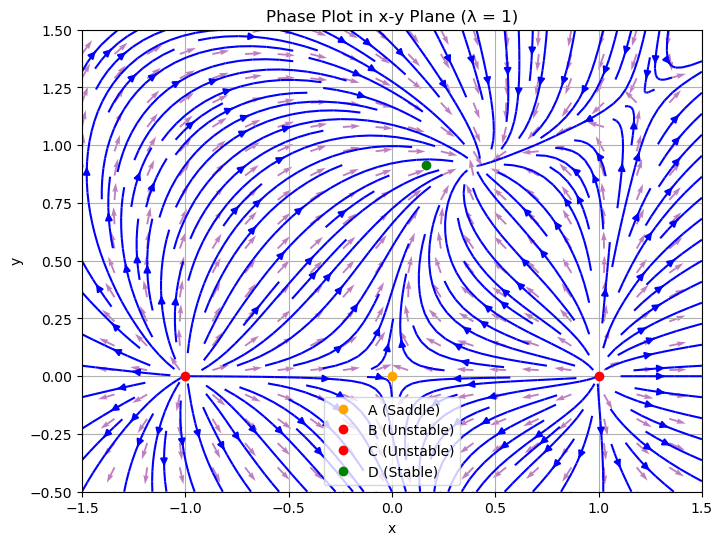

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of equations
def system(X, Y, lambda_val=1):
    # Parameters
    sqrt_3_over_2 = np.sqrt(3/2)
    
    # dx/dt
    dx = -3*X + lambda_val*sqrt_3_over_2*Y**2 + (3/2)*X*(1 + X**2 - Y**2)
    # dy/dt
    dy = -lambda_val*sqrt_3_over_2*X*Y + (3/2)*Y*(1 + X**2 - Y**2)
    
    return dx, dy

# Set up the grid for the phase plot
x = np.linspace(-1.5, 1.5, 20)
y = np.linspace(-0.5, 1.5, 20)
X, Y = np.meshgrid(x, y)

# Compute the vector field
lambda_val = 1  # Fix lambda for the plot
U, V = system(X, Y, lambda_val)

# Normalize the vectors for the quiver plot
magnitude = np.sqrt(U**2 + V**2)
U_norm = U / (magnitude + 1e-10)  # Avoid division by zero
V_norm = V / (magnitude + 1e-10)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the vector field (quiver)
plt.quiver(X, Y, U_norm, V_norm, color='purple', alpha=0.5)

# Plot streamlines
plt.streamplot(X, Y, U, V, color='blue', density=1.5)

# Plot critical points
critical_points = [
    (0, 0, 'orange', 'A (Saddle)'),           # Point A
    (1, 0, 'red', 'B (Unstable)'),           # Point B
    (-1, 0, 'red', 'C (Unstable)'),          # Point C
    (1/6, np.sqrt(5/6), 'green', 'D (Stable)')  # Point D for lambda = 1
]

for (x_c, y_c, color, label) in critical_points:
    plt.plot(x_c, y_c, 'o', color=color, label=label)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Set axis limits
plt.xlim(-1.5, 1.5)
plt.ylim(-0.5, 1.5)

# Add a grid
plt.grid(True)

# Add a title
plt.title(f'Phase Plot in x-y Plane (λ = {lambda_val})')

# Add a legend
plt.legend()

# Show the plot
plt.savefig('phase.png')
plt.show()
